In [1]:
import pandas as pd
# csv_dates = ["170107", "170114", "170121", "170128"]


mta_dfs = []

# for this_date in csv_dates:
#     url = f"/Users/brian_newborn/ds/metis/week1_benson/turnstile_{this_date}.txt"
#     print(f"grabbing {url}")
#     mta_dfs.append(
#         pd.read_csv(url)
#     )

In [2]:
# df_mta = pd.concat(mta_dfs)
df_mta = pd.read_csv("/Users/Kimaya/Desktop/Metis/Projects/Project_Benson/backup.csv")
#reset index
df_mta.reset_index(drop=True)

,Unnamed: 0,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055
5,5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2224055
6,6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2224055
7,7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2224055
8,8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2224055
9,9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2224055


In [3]:
#clean column names
df_mta.rename(columns={"C/A":"CA"}, inplace=True)
df_mta.columns = [column.strip() for column in df_mta.columns]

In [4]:
#time series
df_mta['DATETIME']=df_mta.DATE.str.strip()+' '+df_mta.TIME.str.strip()
df_mta["DATETIME"] = pd.to_datetime(df_mta.DATETIME, infer_datetime_format=True)

In [5]:
#create a new column for weekday
df_mta['WEEKDAY']=pd.to_datetime(df_mta.DATE, errors='coerce')
def to_weekday(time):
    return time.isoweekday()
df_mta['WEEKDAY']=df_mta['WEEKDAY'].apply(to_weekday)

In [6]:
import calendar

def translation(input_list, dictionary):
    output_list = []
    for i in input_list:
        output_list.append(dictionary[i])
    return output_list

weekday_dict = dict(zip(range(7), calendar.day_abbr))
weekday_list = df_mta['WEEKDAY'].transform(lambda x: x-1)
weekday_names = translation(weekday_list.tolist(), weekday_dict)
df_mta['WEEKDAY_NAMES'] = weekday_names

#make turnstile column
df_mta["turnstile"] = df_mta["CA"] + " " +  df_mta["UNIT"] + " " +  df_mta["SCP"]

In [7]:
(df_mta.groupby(["turnstile","DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES",ascending=False)).head(5)

,turnstile,DATETIME,ENTRIES
777743,R135 R031 01-00-00,2018-03-22 08:00:00,2
403687,N183 R415 00-00-00,2018-04-04 05:00:00,2
0,A002 R051 02-00-00,2018-02-24 03:00:00,1
789519,R143 R032 02-03-01,2018-03-07 11:00:00,1
789524,R143 R032 02-03-01,2018-03-08 07:00:00,1


In [8]:
#Drop Duplicates
df_mta.drop_duplicates(subset=["turnstile","DATETIME"],inplace=True)

In [9]:
#Checking for Duplicates after drop
(df_mta.groupby(["turnstile","DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES",ascending=False)).head(5)

,turnstile,DATETIME,ENTRIES
0,A002 R051 02-00-00,2018-02-24 03:00:00,1
789472,R143 R032 02-03-01,2018-02-27 15:00:00,1
789524,R143 R032 02-03-01,2018-03-08 07:00:00,1
789523,R143 R032 02-03-01,2018-03-08 03:00:00,1
789522,R143 R032 02-03-01,2018-03-07 23:00:00,1


In [10]:
df_mta['INTERVAL_ENTRIES'] = df_mta.groupby("turnstile")['ENTRIES'].diff()
df_mta['INTERVAL_EXITS'] = df_mta.groupby("turnstile")['EXITS'].diff()

In [11]:
df_mta['TOTAL_ACTIVITY'] = df_mta['INTERVAL_EXITS'] + df_mta['INTERVAL_ENTRIES']

In [12]:
df_mta["TIME_DELTA"] = df_mta.groupby("turnstile")["DATETIME"].diff()

In [13]:
df_mta.describe()

,Unnamed: 0,index,ENTRIES,EXITS,WEEKDAY,INTERVAL_ENTRIES,INTERVAL_EXITS,TOTAL_ACTIVITY,TIME_DELTA
count,1.184280e+06,1.184280e+06,1.184280e+06,1.184280e+06,1.184280e+06,1.179545e+06,1.179545e+06,1.179545e+06,1179545
mean,5.921410e+05,9.869417e+04,3.911540e+07,3.224069e+07,3.990320e+00,4.159734e+02,-1.141601e+02,3.018133e+02,-1 days +21:18:22.672774
std,3.418729e+05,5.698666e+04,2.047962e+08,1.898749e+08,1.995920e+00,2.279146e+06,3.062550e+06,4.422784e+06,1 days 22:53:58.650377
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.087954e+09,-2.145033e+09,-2.145033e+09,-35 days +03:00:00
25%,2.960708e+05,4.934475e+04,5.034575e+05,2.502155e+05,2.000000e+00,8.000000e+00,6.000000e+00,2.400000e+01,0 days 04:00:00
50%,5.921415e+05,9.869000e+04,2.592976e+06,1.460373e+06,4.000000e+00,6.800000e+01,4.700000e+01,1.560000e+02,0 days 04:00:00
75%,8.882112e+05,1.480350e+05,6.881145e+06,4.823914e+06,6.000000e+00,2.320000e+02,1.560000e+02,4.350000e+02,0 days 04:00:00
max,1.184281e+06,1.991150e+05,2.130068e+09,2.145850e+09,7.000000e+00,1.090671e+09,2.145033e+09,2.145033e+09,3 days 16:00:00


In [14]:
import datetime as dt
df_mta["TOT_ACT_PM"] =  60 * df_mta["TOTAL_ACTIVITY"] / df_mta["TIME_DELTA"].dt.seconds
df_mta["EXITS_PM"] =  60 * df_mta["INTERVAL_EXITS"] / df_mta["TIME_DELTA"].dt.seconds
df_mta["ENTRIES_PM"] =  60 * df_mta["INTERVAL_ENTRIES"] / df_mta["TIME_DELTA"].dt.seconds

In [15]:
print("Too large entries: ", len(df_mta[df_mta["ENTRIES_PM"]>60]))
print("Too small entries: ", len(df_mta[df_mta["ENTRIES_PM"]<0]))

print("Too large exits: ", len(df_mta[df_mta["EXITS_PM"]>60]))
print("Too small exits: ", len(df_mta[df_mta["EXITS_PM"]<0]))
print("NaN: ", len(df_mta[df_mta["ENTRIES_PM"].isna()]))
print("NaN: ", len(df_mta[df_mta["EXITS_PM"].isna()]))
print("Total Data: ", len(df_mta))

print("Both Small: ", len(df_mta[(df_mta["EXITS_PM"]<0) & (df_mta["ENTRIES_PM"]<0)]))



Too large entries:  281
Too small entries:  31551
Too large exits:  189
Too small exits:  28990
NaN:  4737
NaN:  4737
Total Data:  1184280
Both Small:  24754


In [16]:
df_mta[df_mta["ENTRIES_PM"]>60].sort_values(by="ENTRIES_PM", ascending=True)
df_mta_save = df_mta

We're going to drop all of the bad values specified above

In [17]:
mask = (df_mta["ENTRIES_PM"]>60) | \
(df_mta["ENTRIES_PM"]<0) |\
(df_mta["EXITS_PM"]>60) |\
(df_mta["EXITS_PM"]<0) |\
(df_mta["ENTRIES_PM"].isna()) |\
(df_mta["EXITS_PM"].isna())
df_mta2=df_mta
df_mta_clean = df_mta[-mask]


In [18]:
print("Too large entries: ", len(df_mta_clean[df_mta_clean["ENTRIES_PM"]>60]))
print("Too small entries: ", len(df_mta_clean[df_mta_clean["ENTRIES_PM"]<0]))

print("Too large exits: ", len(df_mta_clean[df_mta_clean["EXITS_PM"]>60]))
print("Too small exits: ", len(df_mta_clean[df_mta_clean["EXITS_PM"]<0]))
print("NaN: ", len(df_mta_clean[df_mta_clean["ENTRIES_PM"].isna()]))
print("NaN: ", len(df_mta_clean[df_mta_clean["EXITS_PM"].isna()]))
print("Total Data: ", len(df_mta_clean))

print("Both Small: ", len(df_mta_clean[(df_mta_clean["EXITS_PM"]<0) & (df_mta_clean["ENTRIES_PM"]<0)]))

Too large entries:  0
Too small entries:  0
Too large exits:  0
Too small exits:  0
NaN:  0
NaN:  0
Total Data:  1143560
Both Small:  0


In [19]:
top_15_stations = df_mta_clean.groupby(["STATION","LINENAME"])["TOTAL_ACTIVITY","TOT_ACT_PM"].sum().sort_values(by="TOTAL_ACTIVITY",ascending=False).reset_index()
top_15_stations.reset_index(drop=False)

,index,STATION,LINENAME,TOTAL_ACTIVITY,TOT_ACT_PM
0,0,GRD CNTRL-42 ST,4567S,9535642.0,40837.580460
1,1,34 ST-HERALD SQ,BDFMNQRW,7547975.0,31891.704268
2,2,34 ST-PENN STA,ACE,5448972.0,23087.230803
3,3,42 ST-PORT AUTH,ACENQRS1237W,4862991.0,20483.688161
4,4,14 ST-UNION SQ,LNQR456W,4841372.0,20509.908483
5,5,TIMES SQ-42 ST,1237ACENQRSW,4331270.0,18209.719426
6,6,FULTON ST,2345ACJZ,4138871.0,17647.569410
7,7,47-50 STS ROCK,BDFM,3901667.0,16918.992139
8,8,59 ST COLUMBUS,ABCD1,3770865.0,15786.985952
9,9,FLUSHING-MAIN,7,3678894.0,15356.622419


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
type(top_15_stations)

pandas.core.frame.DataFrame

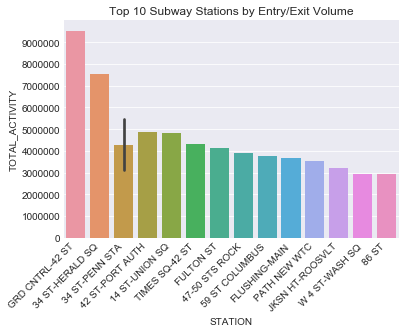

In [21]:
sns.set_style("darkgrid")
sns.barplot(x="STATION",y="TOTAL_ACTIVITY",data=top_15_stations.head(15))
plt.xticks(rotation=45,ha='right')
# xticks =[range(1,10000000,10000)]
plt.yticks(np.arange(0, 10000000, 1000000))
plt.title("Top 10 Subway Stations by Entry/Exit Volume");

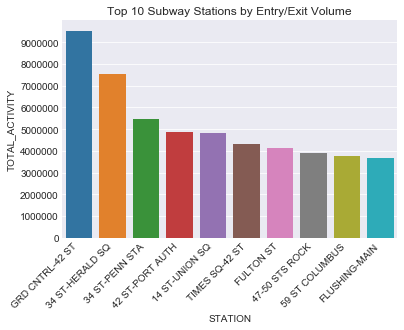

In [22]:
sns.set_style("darkgrid")
sns.barplot(x="STATION",y="TOTAL_ACTIVITY",data=top_15_stations.head(10))
plt.xticks(rotation=45,ha='right')
# xticks =[range(1,10000000,10000)]
plt.yticks(np.arange(0, 10000000, 1000000))
plt.title("Top 10 Subway Stations by Entry/Exit Volume");

In [23]:
groups_by_weekday = df_mta_clean.groupby("WEEKDAY_NAMES", sort=False)["TOTAL_ACTIVITY"].sum().reset_index()

In [ ]:
sns.barplot(x='WEEKDAY_NAMES', y='TOTAL_ACTIVITY', data=groups_by_weekday)

In [24]:
df_mta_clean.head(30)

,Unnamed: 0,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,...,WEEKDAY,WEEKDAY_NAMES,turnstile,INTERVAL_ENTRIES,INTERVAL_EXITS,TOTAL_ACTIVITY,TIME_DELTA,TOT_ACT_PM,EXITS_PM,ENTRIES_PM
1,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,...,6,Sat,A002 R051 02-00-00,7.0,3.0,10.0,04:00:00,0.041667,0.012500,0.029167
2,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,...,6,Sat,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
3,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,...,6,Sat,A002 R051 02-00-00,0.0,2.0,2.0,04:00:00,0.008333,0.008333,0.000000
4,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,...,6,Sat,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
5,5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,...,6,Sat,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
6,6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
7,7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
8,8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
9,9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
10,10,10,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,16:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000


In [27]:

df_mta_clean['TIME'] = df_mta.TIME.str.strip()
mask_bad_time = (df_mta_clean["TIME"].isin(['00:00:00','04:00:00',\
                                           '08:00:00','12:00:00',\
                                           '16:00:00','20:00:00']))

#mask_bad_time = ((df_mta_clean["TIME"] != '00:00:00') &\
#                 (df_mta_clean["TIME"] !='04:00:00') &\
#                 (df_mta_clean["TIME"] !='08:00:00') &\
#                 (df_mta_clean["TIME"] !='12:00:00') &\
#                (df_mta_clean["TIME"] !='16:00:00') &\
#                (df_mta_clean["TIME"] !='20:00:00'))

df_mta_time_clean = df_mta_clean
df_mta_time_clean = df_mta_time_clean[mask_bad_time]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
df_mta_clean.head()

In [28]:
df_mta_time_clean.head(30)

,Unnamed: 0,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,...,WEEKDAY,WEEKDAY_NAMES,turnstile,INTERVAL_ENTRIES,INTERVAL_EXITS,TOTAL_ACTIVITY,TIME_DELTA,TOT_ACT_PM,EXITS_PM,ENTRIES_PM
1,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,...,6,Sat,A002 R051 02-00-00,7.0,3.0,10.0,04:00:00,0.041667,0.012500,0.029167
2,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,...,6,Sat,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
3,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,...,6,Sat,A002 R051 02-00-00,0.0,2.0,2.0,04:00:00,0.008333,0.008333,0.000000
4,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,...,6,Sat,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
5,5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,...,6,Sat,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
6,6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
7,7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
8,8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
9,9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
10,10,10,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,16:00:00,...,7,Sun,A002 R051 02-00-00,0.0,0.0,0.0,04:00:00,0.000000,0.000000,0.000000
